In [38]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

In [39]:
iris=load_iris()
X = iris.data
y= iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

[[11  0  0]
 [ 0 13  2]
 [ 0  0 12]]
0.947368421053


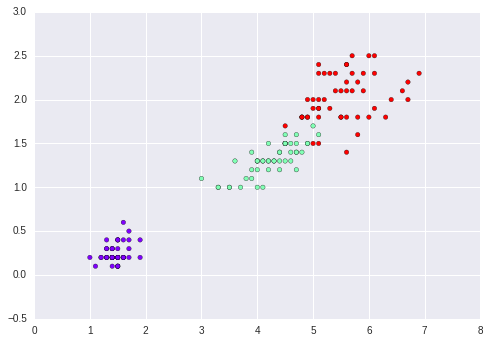

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_score
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
plt.scatter(X[:,2],X[:,3],c=y,cmap='rainbow')
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_pred,y_test))

In [41]:
log_reg_kfold = LogisticRegression()
scores=cross_val_score(log_reg_kfold,X,y,cv=10,scoring='accuracy')


In [68]:
print(scores.mean())

0.953333333333


In [79]:
from sklearn.grid_search import GridSearchCV
#LogisticRegression?
#penalty_options = ['l1','l2']
c_options = list(np.linspace(0.25,1.5,10))
solver_options = ['newton-cg', 'lbfgs', 'liblinear']
param_grid=dict(C=c_options,solver=solver_options)
grid = GridSearchCV(log_reg_kfold,param_grid,cv=10,scoring='accuracy')
print(param_grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'C': [0.25, 0.3888888888888889, 0.52777777777777779, 0.66666666666666674, 0.80555555555555558, 0.94444444444444442, 1.0833333333333335, 1.2222222222222223, 1.3611111111111112, 1.5]}


In [80]:
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.96
{'solver': 'liblinear', 'C': 0.80555555555555558}
LogisticRegression(C=0.80555555555555558, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)
